- A small dataset is extracted from the large dataset to draft out code
- The data set included information from Canada, USA, EU 

In [1]:
# Libraries to work with dataframe
import json
import pandas as pd
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets

In [2]:
# Load the data
df=pd.read_csv(r'/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Midterm_Project/Data/Job/P_Data_Extract_From_Jobs/c76b61c2-436b-4a19-bc26-4363b00dfd60_Data.csv', sep=",")
# Check dataset
df.head()

Time Time Code           Country Name Country Code  \
0  2000    YR2000          United States          USA   
1  2000    YR2000         United Kingdom          GBR   
2  2000    YR2000         European Union          EUU   
3  2000    YR2000  Europe & Central Asia          ECS   
4  2000    YR2000                 Canada          CAN   

  Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC]  \
0                                   13671.0520240061                
1                                   6114.52925918564                
2                                   5821.03076521761                
3                                   4940.30986223073                
4                                   16990.5783936795                

   Employers, female (% of female employment) (modeled ILO estimate) [SL.EMP.MPYR.FE.ZS]  \
0                                           2.240000                                       
1                                           1.672000                                       
2                                           2.771487                                       
3                                           2.444044                                       
4                                           3.274000                                       

   Employers, male (% of male employment) (modeled ILO estimate) [SL.EMP.MPYR.MA.ZS]  \
0                                           5.507000                                   
1                                           4.500000                                   
2                                           6.901186                                   
3                                           5.616116                                   
4                                           7.503000                                   

   Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]  \
0                                           4.021000                                  
1                                           3.212000                                  
2                                           5.123410                                  
3                                           4.226875                                  
4                                           5.567000                                  

   Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]  \
0                                          23.322001                                        
1                                          25.167000                                        
2                                          29.391753                                        
3                                          27.987970                                        
4                                          22.475000                                        

   Employment in industry, female (% of female employment) (modeled ILO estimate) [SL.IND.EMPL.FE.ZS]  \
0                                          12.174000                                                    
1                                          11.953000                                                    
2                                          16.766526                                                    
3                                          17.433606                                                    
4                                          11.167000                                                    

   ...  Population, total [SP.POP.TOTL]  \
0  ...                      282162411.0   
1  ...                       58892514.0   
2  ...                      488178832.0   
3  ...                      862304086.0   
4  ...                       30769700.0   

   Population ages 65 and above, total [SP.POP.65UP.TO]  \
0                                         34763336.0      
1                                          9359172.0      
2             

### Explore the data and data wrangling 


In [3]:
# Inspect datatype in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 40 columns):
 #   Column                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                --------------  -----  
 0   Time                                                                                                                                  223 non-null    object 
 1   Time Code                                                                                                                             221 non-null    object 
 2   Country Name                                                                                                                          221 non-null    object 
 3   Country Code                                                               

Cleaning process

In [4]:
# Replace blank with 0 to convert data float
df = df.replace('..', 0)

In [5]:
# Convert column 20 to 28 from object to float
df.iloc[:, 20:29].astype(float)
# Convert df["Time"] to datetime object
df["Time"] = pd.to_datetime(df["Time"].astype(str), format="%Y", errors='coerce')

In [6]:
# Filter out empty row at the bottom from the raw dataset
df2= df.iloc[0:221]
df2.head()

Time Time Code           Country Name Country Code  \
0 2000-01-01    YR2000          United States          USA   
1 2000-01-01    YR2000         United Kingdom          GBR   
2 2000-01-01    YR2000         European Union          EUU   
3 2000-01-01    YR2000  Europe & Central Asia          ECS   
4 2000-01-01    YR2000                 Canada          CAN   

  Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC]  \
0                                   13671.0520240061                
1                                   6114.52925918564                
2                                   5821.03076521761                
3                                   4940.30986223073                
4                                   16990.5783936795                

   Employers, female (% of female employment) (modeled ILO estimate) [SL.EMP.MPYR.FE.ZS]  \
0                                           2.240000                                       
1                                           1.672000                                       
2                                           2.771487                                       
3                                           2.444044                                       
4                                           3.274000                                       

   Employers, male (% of male employment) (modeled ILO estimate) [SL.EMP.MPYR.MA.ZS]  \
0                                           5.507000                                   
1                                           4.500000                                   
2                                           6.901186                                   
3                                           5.616116                                   
4                                           7.503000                                   

   Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]  \
0                                           4.021000                                  
1                                           3.212000                                  
2                                           5.123410                                  
3                                           4.226875                                  
4                                           5.567000                                  

   Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]  \
0                                          23.322001                                        
1                                          25.167000                                        
2                                          29.391753                                        
3                                          27.987970                                        
4                                          22.475000                                        

   Employment in industry, female (% of female employment) (modeled ILO estimate) [SL.IND.EMPL.FE.ZS]  \
0                                          12.174000                                                    
1                                          11.953000                                                    
2                                          16.766526                                                    
3                                          17.433606                                                    
4                                          11.167000                                                    

   ...  Population, total [SP.POP.TOTL]  \
0  ...                      282162411.0   
1  ...                       58892514.0   
2  ...                      488178832.0   
3  ...                      862304086.0   
4  ...                       30769700.0   

   Population ages 65 and above, total [SP.POP.65UP.TO]  \
0                                         34763336.0      
1                                          93591

### Reshaping the data

In [7]:
# Renaming the column for analysis 
df3= df2.iloc[:, 0:4]
df3


Time Time Code                                   Country Name  \
0   2000-01-01    YR2000                                  United States   
1   2000-01-01    YR2000                                 United Kingdom   
2   2000-01-01    YR2000                                 European Union   
3   2000-01-01    YR2000                          Europe & Central Asia   
4   2000-01-01    YR2000                                         Canada   
..         ...       ...                                            ...   
216 2016-01-01    YR2016                                  North America   
217 2016-01-01    YR2016                            East Asia & Pacific   
218 2016-01-01    YR2016                                     South Asia   
219 2016-01-01    YR2016  Europe & Central Asia (excluding high income)   
220 2016-01-01    YR2016    East Asia & Pacific (excluding high income)   

    Country Code  
0            USA  
1            GBR  
2            EUU  
3            ECS  
4            CAN  
..           ...  
216          NAC  
217          EAS  
218          SAS  
219          ECA  
220          EAP  

[221 rows x 4 columns]

In [8]:
# Rename the column  for easy analysis
df3["employer_pct_female"]= df2.iloc[:, 5]
df3["employer_pct_male"]= df2.iloc[:, 6]
df3["employer_pct_total"]= df2.iloc[:, 7]
df3["industry_pct_female"]= df2.iloc[:, 8]
df3["industry_pct_male"]= df2.iloc[:, 9]
df3["industry_pct_total"]= df2.iloc[:, 10]
df3["service_pct_female"]= df2.iloc[:, 11]
df3["service_pct_male"]= df2.iloc[:, 12]
df3["service_pct_total"]= df2.iloc[:, 13]
df3["agriculture_pct_female"]= df2.iloc[:, 14]
df3["agriculture_pct_male"]= df2.iloc[:, 15]
df3["agriculture_pct_total"]= df2.iloc[:, 16]
df3["laborforce_pct_female"]= df2.iloc[:, 17]
df3["laborforce_pct_male"]= df2.iloc[:, 18]
df3["laborforce_pct_total"]= df2.iloc[:, 19]
df3["advance_education_pct_total"]= df2.iloc[:, 20]
df3["advance_education_pct_female"]= df2.iloc[:, 21]
df3["advance_education_pct_male"]= df2.iloc[:, 22]
df3["intermediate_education_pct_total"]= df2.iloc[:, 26]
df3["intermediate_education_pct_female"]= df2.iloc[:, 27]
df3["intermediate_education_pct_male"]= df2.iloc[:, 28]
df3["basic_education_pct_total"]= df2.iloc[:, 23]
df3["basic_education_pct_female"]= df2.iloc[:, 24]
df3["basic_education_pct_male"]= df2.iloc[:, 25]
df3["wages_and_salaries_pct_female"]= df2.iloc[:, 36]
df3["wages_and_salaries_pct_male"]= df2.iloc[:, 37]
df3["wages_and_salaries_pct_total"]= df2.iloc[:, 38]
df3["Laborforce_pop_total"]= df2.iloc[:, 29]
df3["Population_total"]= df2.iloc[:, 30]
df3["Population_density"]= df2.iloc[:, 35]

# Checking the created data
df3.head()

Time Time Code           Country Name Country Code  \
0 2000-01-01    YR2000          United States          USA   
1 2000-01-01    YR2000         United Kingdom          GBR   
2 2000-01-01    YR2000         European Union          EUU   
3 2000-01-01    YR2000  Europe & Central Asia          ECS   
4 2000-01-01    YR2000                 Canada          CAN   

   employer_pct_female  employer_pct_male  employer_pct_total  \
0             2.240000           5.507000            4.021000   
1             1.672000           4.500000            3.212000   
2             2.771487           6.901186            5.123410   
3             2.444044           5.616116            4.226875   
4             3.274000           7.503000            5.567000   

   industry_pct_female  industry_pct_male  industry_pct_total  ...  \
0            23.322001          12.174000           32.632000  ...   
1            25.167000          11.953000           36.221001  ...   
2            29.391753          16.766526           38.940407  ...   
3            27.987970          17.433606           36.217034  ...   
4            22.475000          11.167000           32.016998  ...   

   intermediate_education_pct_male  basic_education_pct_total  \
0                  65.277099609375           28.2973003387451   
1                 82.6612014770508           63.4682998657227   
2                 69.6430596093734            34.678471795372   
3                                0                          0   
4                 70.0493011474609           42.8895988464355   

   basic_education_pct_female  basic_education_pct_male  \
0            51.9124984741211          40.0872001647949   
1            76.8231964111328          69.0785980224609   
2            55.7980557240972          43.6277173679696   
3                           0                         0   
4            60.4964981079102          51.7464981079102   

   wages_and_salaries-pct_female  wages_and_salaries_pct_male  \
0                      91.585999                    86.290001   
1                      92.141998                    83.941002   
2                      85.157378                    79.046368   
3                      81.372209                    77.657763   
4                      87.636002                    80.613998   

   wages_and_salaries_pct_total  Laborforce_pop_total  Population_total  \
0                     88.699997           146767599.0       282162411.0   
1                     87.676003            29295681.0        58892514.0   
2                     81.677008           228526899.0       488178832.0   
3                     79.284578           397686380.0       862304086.0   
4                     83.828003            16235249.0        30769700.0   

  Population_density  
0          30.797301  
1         243.427909  
2         115.084593  
3          31.414610  
4           3.383699  

[5 rows x 34 columns]

In [14]:
# Save the data in to the cleanjobdf
# df3.to_csv(r'/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Midterm_Project/Data/Cleanjobdf/Cleanjobdf.csv', index= False)

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Time                               221 non-null    datetime64[ns]
 1   Time Code                          221 non-null    object        
 2   Country Name                       221 non-null    object        
 3   Country Code                       221 non-null    object        
 4   employer_pct_female                221 non-null    float64       
 5   employer_pct_male                  221 non-null    float64       
 6   employer_pct_total                 221 non-null    float64       
 7   industry_pct_female                221 non-null    float64       
 8   industry_pct_male                  221 non-null    float64       
 9   industry_pct_total                 221 non-null    float64       
 10  service_pct_female                 221

AttributeError: module 'matplotlib' has no attribute 'show'

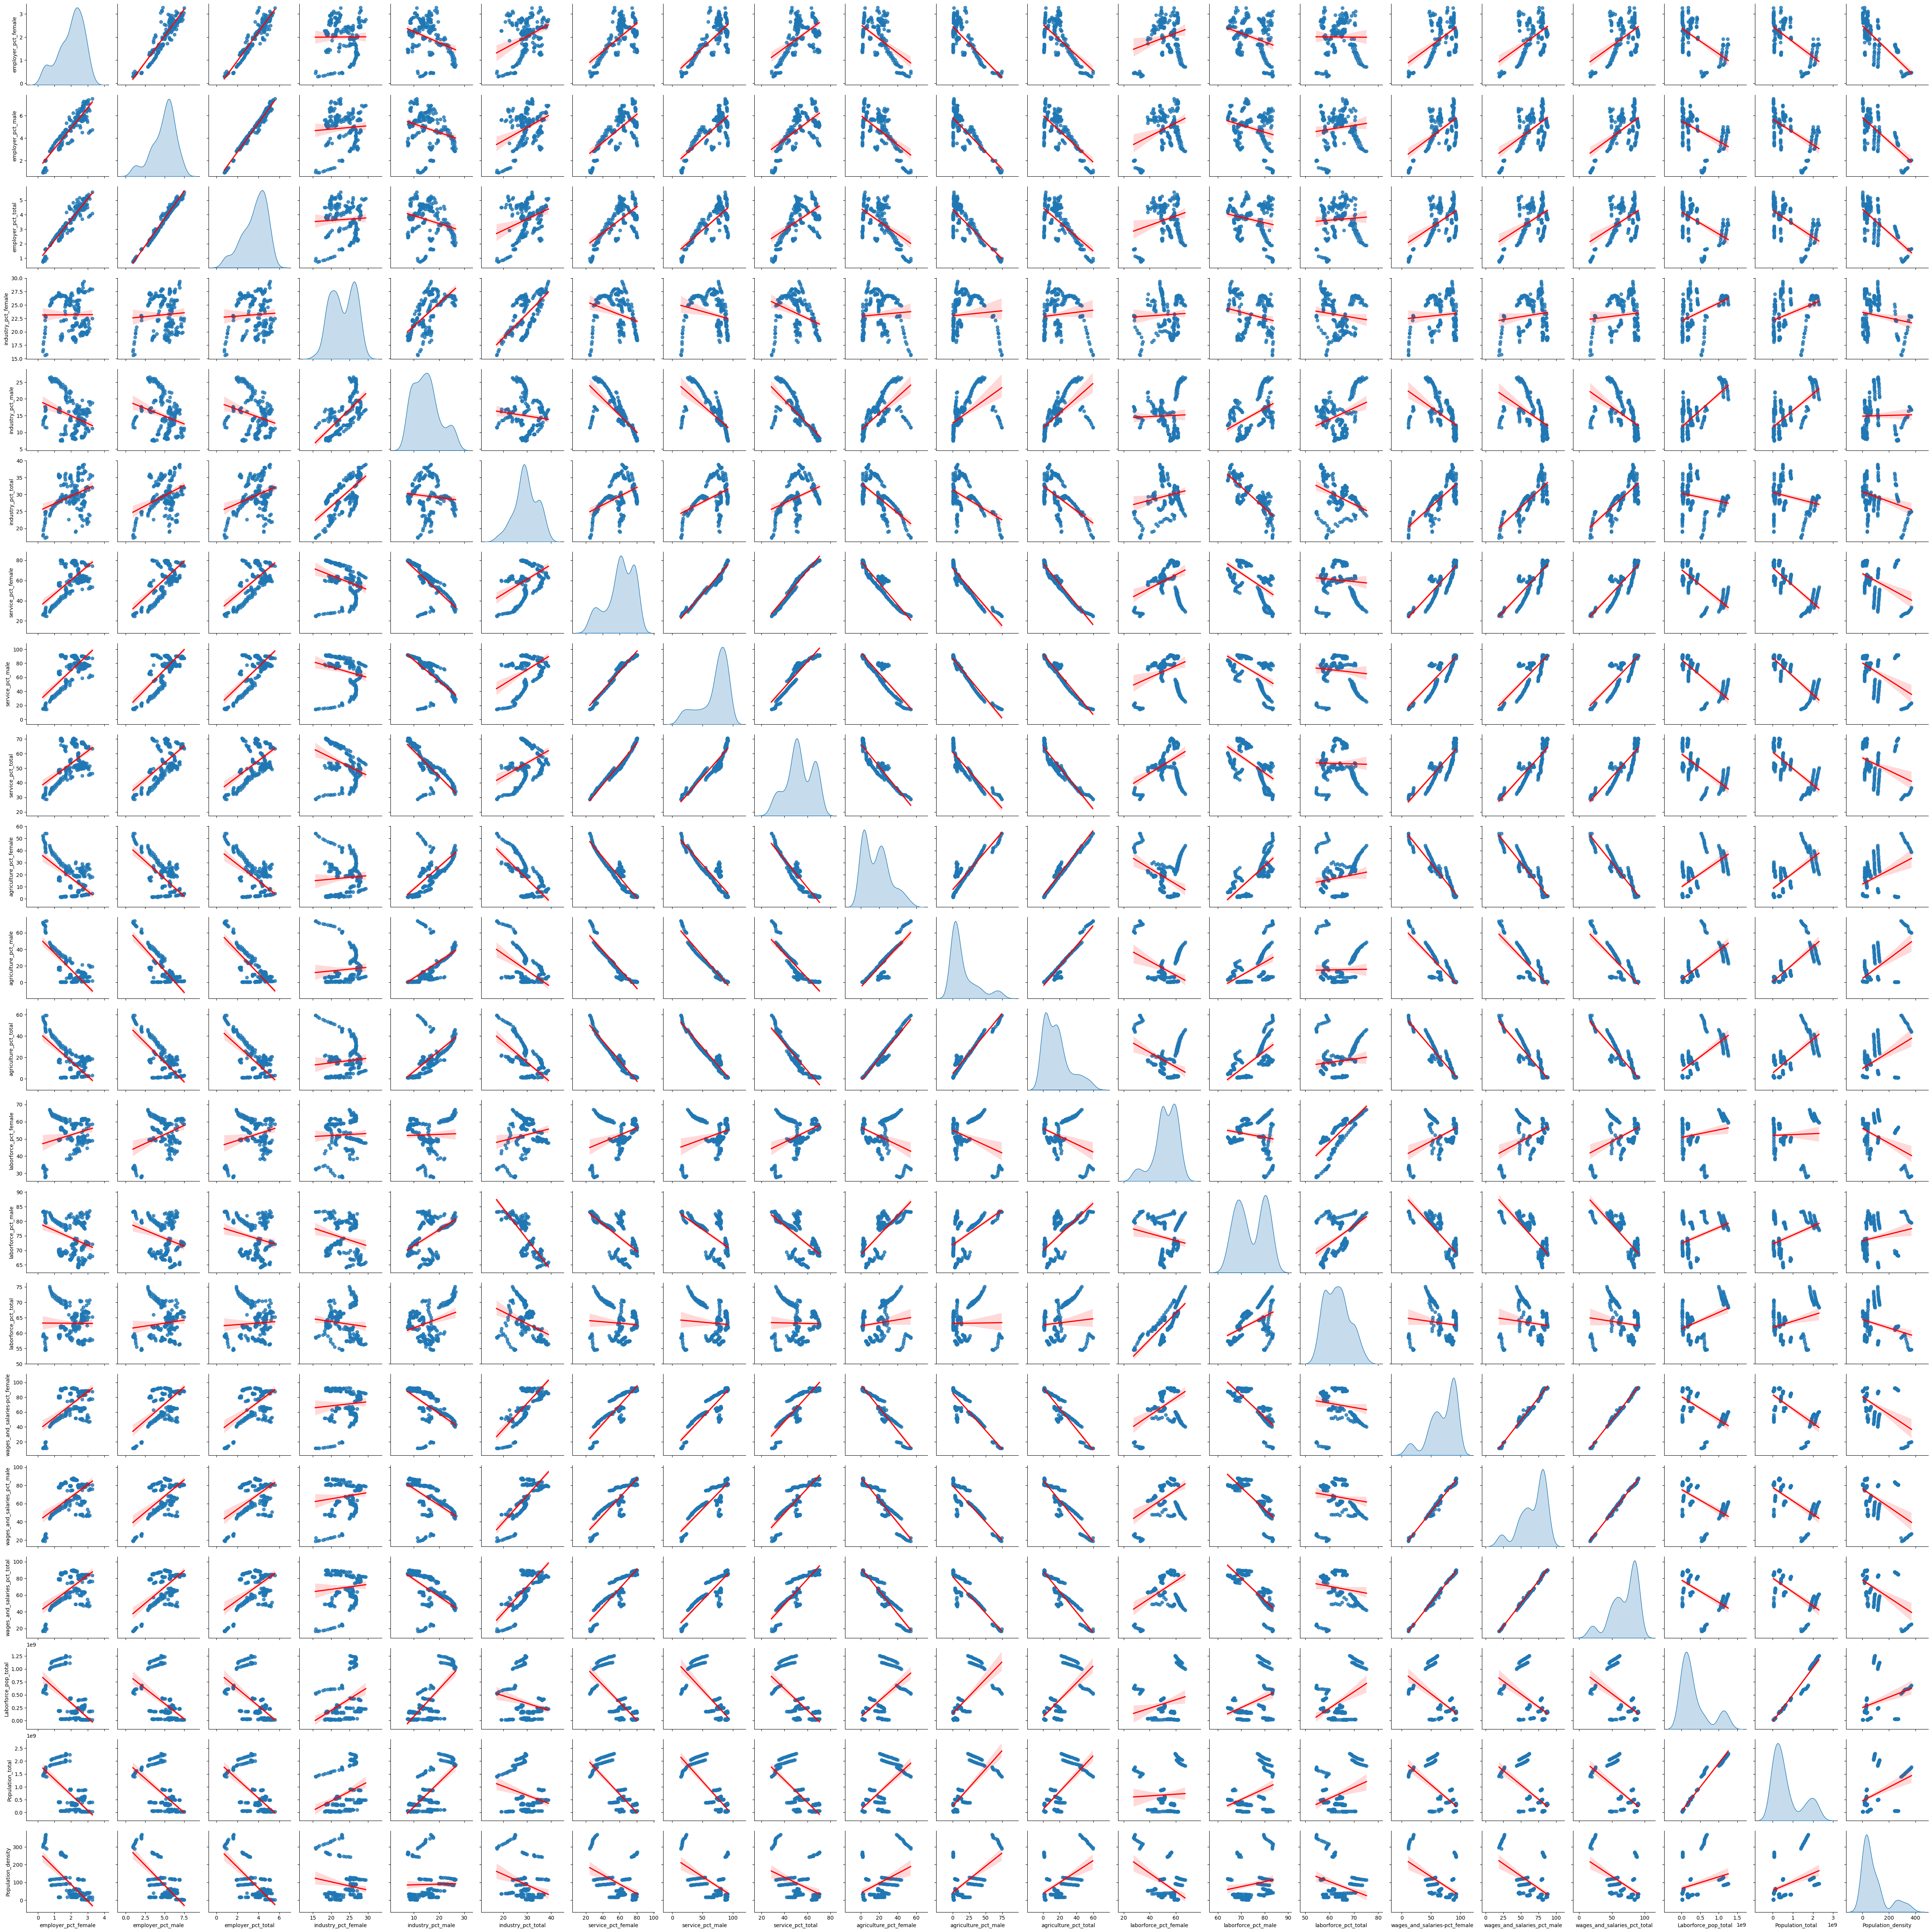

In [10]:
# Industry and employment data
industry_data= df.iloc[:, 0:19]
fig_1=sns.pairplot(data=df3,
                    kind='reg', 
                    diag_kind='kde',
                    plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [11]:
# Calculate the correlation of different industry and % of employment
corr=df3.iloc[:,0:16].corr()
corr

/var/folders/4c/r7kxsc7j67gd7wlqt50rmb100000gn/T/ipykernel_16066/4172673390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df3.iloc[:,0:16].corr()


employer_pct_female  employer_pct_male  \
employer_pct_female                1.000000           0.915224   
employer_pct_male                  0.915224           1.000000   
employer_pct_total                 0.947174           0.987028   
industry_pct_female                0.004957           0.065436   
industry_pct_male                 -0.331407          -0.267161   
industry_pct_total                 0.353940           0.377883   
service_pct_female                 0.650623           0.671093   
service_pct_male                   0.737397           0.747425   
service_pct_total                  0.553429           0.596446   
agriculture_pct_female            -0.573322          -0.616678   
agriculture_pct_male              -0.770322          -0.799106   
agriculture_pct_total             -0.678990          -0.713322   

                        employer_pct_total  industry_pct_female  \
employer_pct_female               0.947174             0.004957   
employer_pct_male                 0.987028             0.065436   
employer_pct_total                1.000000             0.051809   
industry_pct_female               0.051809             1.000000   
industry_pct_male                -0.250996             0.674013   
industry_pct_total                0.324758             0.652017   
service_pct_female                0.629960            -0.294395   
service_pct_male                  0.726507            -0.217428   
service_pct_total                 0.538719            -0.350902   
agriculture_pct_female           -0.551398             0.067180   
agriculture_pct_male             -0.779051             0.073667   
agriculture_pct_total            -0.667533             0.091741   

                        industry_pct_male  industry_pct_total  \
employer_pct_female             -0.331407            0.353940   
employer_pct_male               -0.267161            0.377883   
employer_pct_total              -0.250996            0.324758   
industry_pct_female              0.674013            0.652017   
industry_pct_male                1.000000           -0.102826   
industry_pct_total              -0.102826            1.000000   
service_pct_female              -0.768643            0.432953   
service_pct_male                -0.687926            0.439372   
service_pct_total               -0.782582            0.385679   
agriculture_pct_female           0.676244           -0.654248   
agriculture_pct_male             0.534697           -0.484219   
agriculture_pct_total            0.655977           -0.591308   

                        service_pct_female  service_pct_male  \
employer_pct_female               0.650623          0.737397   
employer_pct_male                 0.671093          0.747425   
employer_pct_total                0.629960          0.726507   
industry_pct_female              -0.294395         -0.217428   
industry_pct_male                -0.768643         -0.687926   
industry_pct_total                0.432953          0.439372   
service_pct_female                1.000000          0.977866   
service_pct_male                  0.977866          1.000000   
service_pct_total                 0.983948          0.928529   
agriculture_pct_female           -0.952927         -0.909674   
agriculture_pct_male             -0.933888         -0.981148   
agriculture_pct_total            -0.978662         -0.972147   

                        service_pct_total  agriculture_pct_female  \
employer_pct_female              0.553429               -0.573322   
employer_pct_male                0.596446               -0.616678   
employer_pct_total               0.538719               -0.551398   
industry_pct_female             -0.350902                0.067180   
industry_pct_male               -0.782582                0.676244   
industry_pct_total               0.385679               -0.654248   
service_pct_female               0.983948               -0.952927   
service_pct_male                 0.928529               -0.909

<AxesSubplot:>

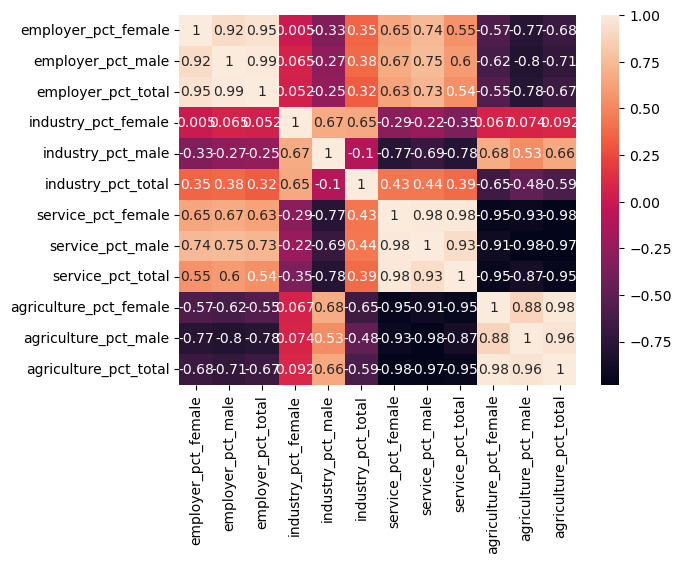

In [12]:
# Create a heat map with correlation data
sns.heatmap(data= corr, annot=True)